In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Filtering

## Mean filtering
- Replace pixel by the mean of neighboring pixels
- $S[f](m,n) = \sum^1_{i=-1}\sum^1_{i=-1} \frac{f(m+i,n+j)}{9}$

**A more general version**
- $S[f](m,n) = \sum^1_{i=-1}\sum^1_{i=-1} w(i,j)f(m+i,n+j)$

Here, $w(i,j)$ is called **kernal** or **filter**

**Even more general version**
- $S[f](m,n) = \sum^k_{i=-k}\sum^k_{i=-k} \frac{f(m+i,n+j)}{9}$

Here, the size of the kernel is $2k+1$

- $w(i,j) = \frac{1}{(2k+1)^2}$ : mean filter
- $w(i,j)\geq 0$ && sum to 1 : *weighted* mean
- $w(i,j)$ can be arbitrary real numbers
    - This operation is called **cross-correlation**

### Boundary conditions
- "Full" : computer if *any* part of kernel intersects with image
    - Assumes image is padded with 0's
    - Output size = $m+k-1$
    - Technically cross-correlation and convolution means this
    - Image with0 padding can result artifacts
- "Same convolution" : compute if center of kernel is in image
    - Assumes image is padded with 0's
    - output size = $m$
    - Common in practice
- "Valid convolution": computer only if all of kernel is in image
    - no padding
    - output size = $m-k+1$
    - No artifacts

Using `np.pad` makes it easy to add padding to the image matrix. 

In [2]:
a = np.array([[1,2,3,4,5],[1,2,3,4,5]])

In [3]:
dummy_filter = np.array([[0,0,0],[0,1,0],[0,0,0]])

In [4]:
np.pad(a, ((5, 5), (1, 1)), 'constant')

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4, 5, 0],
       [0, 1, 2, 3, 4, 5, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [5]:
np.ndim(a)

2

In [32]:
np.amax(a)

5

In [33]:
np.zeros_like(a, np.bool)

array([[False, False, False, False, False],
       [False, False, False, False, False]])

In [34]:
a_pad = np.pad(a, ((len(dummy_filter) // 2, len(dummy_filter) // 2), (len(dummy_filter[0]) // 2, len(dummy_filter[0]) // 2)), 'constant')

In [35]:
a_pad

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4, 5, 0],
       [0, 1, 2, 3, 4, 5, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [46]:
a_pad[1:4,0:2]

array([[0, 1],
       [0, 1],
       [0, 0]])

In [7]:
b = np.array([[[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]],[[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]]])

In [8]:
b

array([[[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]],

       [[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]]])

In [9]:
np.pad(b, [(0, 0), (5, 5), (2, 2)], 'constant', constant_values=0)

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 2, 3, 4, 5, 0, 0],
        [0, 0, 1, 2, 3, 4, 5, 0, 0],
        [0, 0, 1, 2, 3, 4, 5, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 2, 3, 4, 5, 0, 0],
        [0, 0, 1, 2, 3, 4, 5, 0, 0],
        [0, 0, 1, 2, 3, 4, 5, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]])

In [10]:
np.ndim(b)

3

In [11]:
np.convolve([1, 2, 3], [0, 1, 0.5])

array([0. , 1. , 2.5, 4. , 1.5])

In [12]:
dummy = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])

In [13]:
def output_pixel(cropped_img, filt):
    return cropped_img * filt

In [14]:
output_pixel(dummy, dummy)

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [15]:
dummy * dummy

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [16]:
flipped_dummy = np.flip(dummy)

In [17]:
output_pixel(dummy, flipped_dummy)

array([[ 9, 16, 21],
       [24, 25, 24],
       [21, 16,  9]])

In [18]:
dummy[0:3,0:2]

array([[1, 2],
       [4, 5],
       [7, 8]])

In [19]:
dummy_3d = np.array([[[1, 2, 3],[4, 5, 6],[7, 8, 9]],
                   [[1, 2, 3],[4, 5, 6],[7, 8, 9]],
                   [[1, 2, 3],[4, 5, 6],[7, 8, 9]]])

In [20]:
dummy_3d

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [21]:
dummy_3d.shape

(3, 3, 3)

In [22]:
np.pad(dummy_3d, ((1,1), (1,1), (0,0)), 'constant').shape

(5, 5, 3)

In [23]:
np.pad(dummy_3d, ((0,0), (2,1), (1,1)), 'constant')

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 2, 3, 0],
        [0, 4, 5, 6, 0],
        [0, 7, 8, 9, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 2, 3, 0],
        [0, 4, 5, 6, 0],
        [0, 7, 8, 9, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 2, 3, 0],
        [0, 4, 5, 6, 0],
        [0, 7, 8, 9, 0],
        [0, 0, 0, 0, 0]]])

In [24]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
np.zeros([5, 4, 3])

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [26]:
np.empty((5,5))

array([[3.10503618e+231, 3.10503618e+231, 6.42285340e-323,
        0.00000000e+000, 6.93468224e-310],
       [1.16095484e-028, 4.13798585e-114, 6.19493421e+223,
        1.33737683e+185, 1.06488730e-081],
       [6.19489898e+223, 1.33737683e+185, 1.06488730e-081,
        1.01523459e+213, 8.15080439e+276],
       [3.26444064e+132, 3.00154763e-067, 3.02672065e+257,
        6.50944377e+252, 1.06486598e-081],
       [3.13147523e-120, 6.96055573e+252, 6.32672818e+180,
        4.74483502e+170, 1.41957500e+295]])

In [27]:
x = np.array([-1, +1, +1, -1])
y = np.array([-1, -1, +1, +1])
np.arctan2(y, x)

array([-2.35619449, -0.78539816,  0.78539816,  2.35619449])

In [28]:
np.arctan2(y, x) / np.pi

array([-0.75, -0.25,  0.25,  0.75])

### Properties : Linearity
**Addition**

$(w \otimes f) (m,n) = \sum ^k_{i=-k}\sum ^k_{j=-k} w(i,j)f(m+i,n+j)$

$ f' = af + bg $

$ w \otimes f' = a(w \otimes f) + b(w \otimes g) $



**Multiplication**

$(w \otimes f) (m,n) = \sum ^k_{i=-k}\sum ^k_{j=-k} w(i,j)f(m+i,n+j)$

$ f'(m,n) = af(m,n) $ also noted as $ f' = af $

$ (w \otimes f')(m,n) = a(w \otimes f)(m,n) $ also noted as $ (w \otimes f') = a(w \otimes f) $

### Properties : Shift equivariance
- shift, then filter = filter, then shift
- Output of filtering does not depend on where the pixel is

$ f'(m,n) = f(m - m_0, n - n_0 $

$ (w \otimes f')(m,n) = (w \otimes f)(m-m_0, n-n_0) $

## Cross-Correlation & Convolution
* Cross-Correlation
    * $ S[f] = (w \otimes f) $
    * $ S[f](m,n) = \sum^k_{i=-k}\sum^k_{j=-k}w(i,j)f(m+i,n+j) $
* Convolution
    * $ S[f] = (w * f) $
    * $ S[f](m,n) = \sum^k_{i=-k}\sum^k_{j=-k}w(i,j)f(m-i,n-j) $

* Convolution is the more fundamental operation
* "Full" convolution satisfies associative property:
    * $a * (b * c) = (a * b) * c$

## Examples of filters
### Identical Image
* Original * Kernel = Identical Image
* $f * \frac{1}{9}k = g$

### Mean filter (blurs)
* Original * Kernel = Blurred Image
* $f * \frac{1}{9}k = g$

### Sharpening
* Opposite of blurring
* $f_{sharp} = f + \alpha(f-f_{blur}) \\ = (1 + \alpha)f - \alpha f_{blur} \\ (1 + \alpha) (w * f) - \alpha(v*f) \\ ((1+\alpha)w - \alpha v) * f$

### Median filter
* Mean is sensitive to outliers
    * e.g. pixels which have very high or very low intensity ("dead pixels")
* More robust measure: *median*

### Other Non-linear filters : Thresholding
* $g(m,n)\begin{cases}
      255 & f(m,n) > A \\
      0 & \text{otherwise}
    \end{cases}$

### Other Non-linear filters : Rectification
* $ g(m,n) = max(f(m,n),0) $
* Crucial component of modern convolutional networks

## What would cross-correlating this filter do?

In [29]:
np.array([[-1,-1,-1,-1,-1,-1,-1],[1,-1,-1,-1,-1,-1,-1],[1,1,-1,-1,-1,-1,-1],[1,1,1,-1,-1,-1,-1],[1,1,1,1,-1,-1,-1],[1,1,1,1,1,-1,-1],[1,1,1,1,1,1,-1]])

array([[-1, -1, -1, -1, -1, -1, -1],
       [ 1, -1, -1, -1, -1, -1, -1],
       [ 1,  1, -1, -1, -1, -1, -1],
       [ 1,  1,  1, -1, -1, -1, -1],
       [ 1,  1,  1,  1, -1, -1, -1],
       [ 1,  1,  1,  1,  1, -1, -1],
       [ 1,  1,  1,  1,  1,  1, -1]])

## Why is convolution important?
* Shift equivariance is a crucial property
* We *like* linearity
    * Linear functions behave predictably when input changes
    * Lots of theory just easier with linear functions
* All linear shift-equivariant systems can be expressed as a convolution

In [30]:
test_loc = 'assets/test.png'
test_img = cv2.imread(test_loc, cv2.IMREAD_GRAYSCALE)

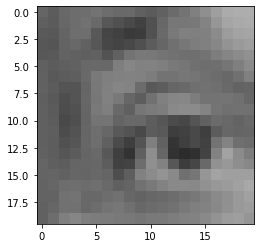

In [31]:
plt.imshow(test_img, cmap='gray', vmin=0, vmax=255)
plt.show()